<a href="https://colab.research.google.com/github/haneesha1026/AI-ImpactSense/blob/main/AdvanceModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

In [49]:
df = pd.read_csv("earthquake_alert_balanced_dataset.csv")

In [50]:
le = LabelEncoder()
df["alert"] = le.fit_transform(df["alert"])

In [51]:
X = df.drop(columns=["alert"])
y = df["alert"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
log_model = LogisticRegression(max_iter=2000, solver='liblinear')
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

In [44]:
print("\n===== Logistic Regression Results =====")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("MAE:", mean_absolute_error(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))


===== Logistic Regression Results =====
Accuracy: 0.623015873015873
MAE: 0.6984126984126984

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77        73
           1       0.62      0.39      0.48        64
           2       0.64      0.83      0.72        63
           3       0.41      0.50      0.45        52

    accuracy                           0.62       252
   macro avg       0.62      0.61      0.61       252
weighted avg       0.64      0.62      0.62       252



In [45]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

In [46]:
print("\n===== Decision Tree Results =====")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))


===== Decision Tree Results =====
Accuracy: 0.8134920634920635
MAE: 0.373015873015873

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        73
           1       0.89      0.75      0.81        64
           2       0.77      0.97      0.86        63
           3       0.71      0.79      0.75        52

    accuracy                           0.81       252
   macro avg       0.82      0.82      0.81       252
weighted avg       0.83      0.81      0.81       252



WEEK 4

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [53]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\n----- Random Forest Results -----")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


----- Random Forest Results -----
Accuracy: 0.9384615384615385
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        68
           1       0.92      0.99      0.95        73
           2       1.00      0.98      0.99        64
           3       0.88      0.95      0.91        55

    accuracy                           0.94       260
   macro avg       0.94      0.94      0.94       260
weighted avg       0.94      0.94      0.94       260



In [54]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("\n----- Gradient Boosting Results -----")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))


----- Gradient Boosting Results -----
Accuracy: 0.9153846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87        68
           1       0.92      0.95      0.93        73
           2       0.95      0.98      0.97        64
           3       0.86      0.91      0.88        55

    accuracy                           0.92       260
   macro avg       0.91      0.92      0.91       260
weighted avg       0.92      0.92      0.91       260



In [13]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 4, 8]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid,
                    cv=3,
                    scoring="accuracy",
                    n_jobs=-1)

grid.fit(X_train, y_train)

print("\n--- Best Random Forest Parameters ---")
print(grid.best_params_)


--- Best Random Forest Parameters ---
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}


In [27]:
best_rf = grid.best_estimator_
best_pred = best_rf.predict(X_test)

print("\n--- Tuned Random Forest Accuracy ---")
print("Accuracy:", accuracy_score(y_test, best_pred))
print("Classification Report:\n", classification_report(y_test, best_pred))


--- Tuned Random Forest Accuracy ---
Accuracy: 0.9192307692307692
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        68
           1       0.92      0.95      0.93        73
           2       0.98      0.97      0.98        64
           3       0.84      0.93      0.88        55

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260



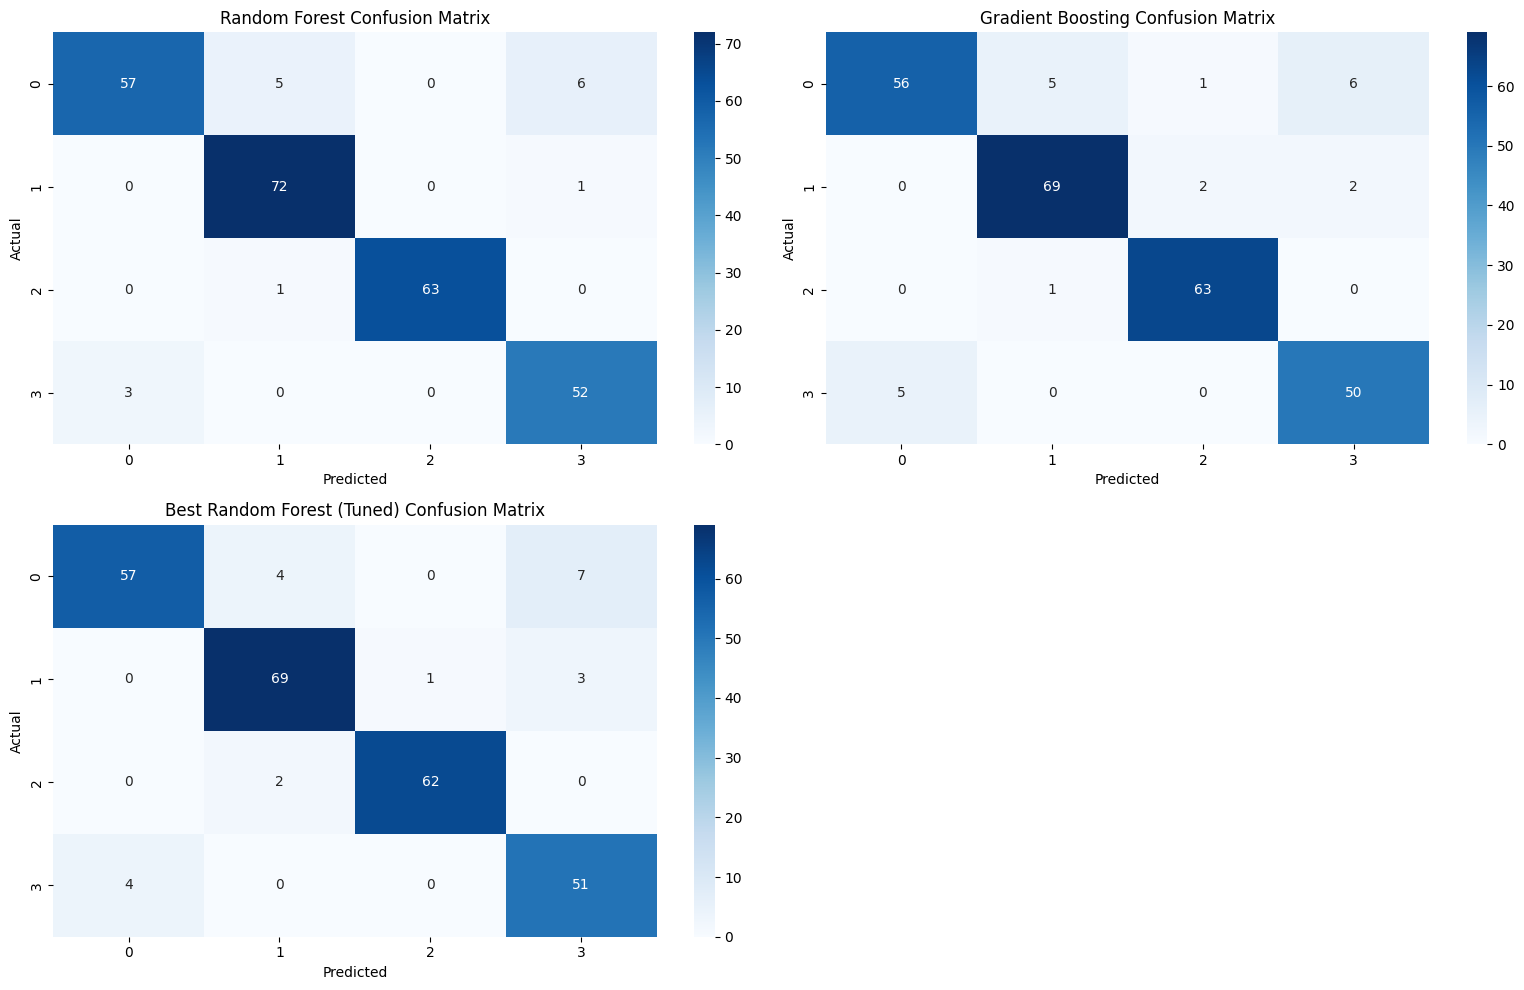

In [15]:
models = {
    "Random Forest": rf_pred,
    "Gradient Boosting": gb_pred,
    "Best Random Forest (Tuned)": best_pred
}

plt.figure(figsize=(16, 10))

i = 1
for model_name, preds in models.items():
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(model_name + " Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    i += 1

plt.tight_layout()
plt.show()

LR

In [16]:
sample = pd.DataFrame([[6.5, 12, 4, 4, 50]], columns=X.columns)
print(log_model.predict(sample))
le.inverse_transform(log_model.predict(sample))

[0]


array(['green'], dtype=object)

In [17]:
sample2 = pd.DataFrame([[8.0, 20, 7, 7, 120]], columns=X.columns)
print(log_model.predict(sample2))
print(le.inverse_transform(log_model.predict(sample2)))

[2]
['red']


In [18]:
sample3 = pd.DataFrame([[7.8, 50, 6, 7, 200]], columns=X.columns)
print(log_model.predict(sample3))
print(le.inverse_transform(log_model.predict(sample3)))

[2]
['red']


RF

In [19]:
sample1 = pd.DataFrame([[4.2, 30, 1, 2, 10]], columns=X.columns)
rf_pred = rf.predict(sample1)
le.inverse_transform(rf_pred)

array(['green'], dtype=object)

In [20]:
sample2 = pd.DataFrame([[6.8, 80, 6, 6, 250]], columns=X.columns)
rf_pred = rf.predict(sample2)
le.inverse_transform(rf_pred)

array(['yellow'], dtype=object)

In [21]:
sample3 = pd.DataFrame([[7.5, 10, 8, 8, 500]], columns=X.columns)
rf_pred = rf.predict(sample3)
le.inverse_transform(rf_pred)

array(['red'], dtype=object)

XGB

In [22]:
sample1 = pd.DataFrame([[4.0, 10, 1, 1, -20]], columns=X.columns)
gb.predict(sample1)

array([0])

In [23]:
sample2 = pd.DataFrame([[5.5, 50, 3, 3, 40]], columns=X.columns)
gb.predict(sample2)

array([0])

In [24]:
sample3 = pd.DataFrame([[6.4, 120, 5, 5, 90]], columns=X.columns)
gb.predict(sample3)

array([0])

In [25]:
sample4 = pd.DataFrame([[7.5, 15, 8, 7, 180]], columns=X.columns)
gb.predict(sample4)

array([3])